In [9]:
!pip install seaborn opendatasets

In [10]:
# Importar librerías estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Esto es para que los gráficos se vean ahí mismo en el Jupyter
%matplotlib inline

In [13]:
import opendatasets as od
import pandas as pd
import os

# TRUCO: Usamos este link que es el mismo Titanic pero subido como dataset público
# Así evitamos el error 401 de las competencias
dataset_url = "https://www.kaggle.com/datasets/yasserh/titanic-dataset"

# Descargamos (si te pide clave de nuevo, pon la misma: alexisarcos + el código largo)
od.download(dataset_url)

# Verificamos qué se bajó
print("Carpetas:", os.listdir())

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  alexisarcos


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset


100%|██████████| 22.0k/22.0k [00:00<00:00, 241kB/s]


Carpetas: ['.git', '.ipynb_checkpoints', 'Estructuras del Control.ipynb', 'Exam_Demo (1).ipynb', 'Ficheros.ipynb', 'img', 'introduccion Python.ipynb', 'iris', 'Librerias Numpy.ipynb', 'pandas librerias parte2.ipynb', 'Pandas librerias.ipynb', 'posible_examen.ipynb', 'Python Data Types.ipynb', 'Python Funciones.ipynb', 'res', 'titanic-dataset']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


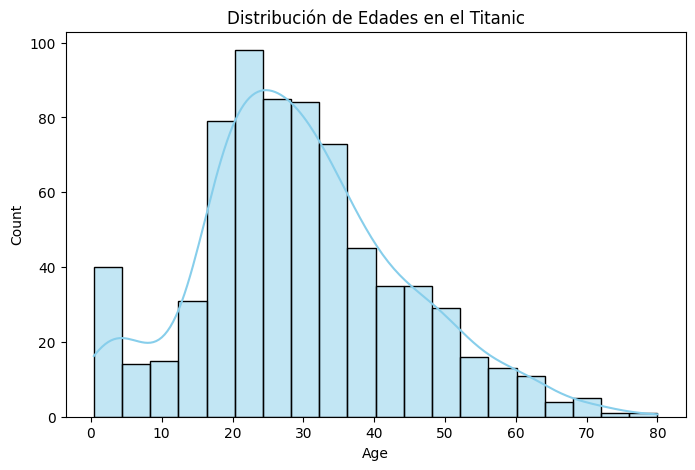

In [14]:
# 1. Cargar el archivo (fíjate que la ruta cambia un poquito)
df = pd.read_csv('titanic-dataset/Titanic-Dataset.csv')

# 2. Ver que todo esté bien
display(df.head())

# 3. ¡TU PRIMER GRÁFICO! (Histograma de edades)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', kde=True, color='skyblue')
plt.title('Distribución de Edades en el Titanic')
plt.show()

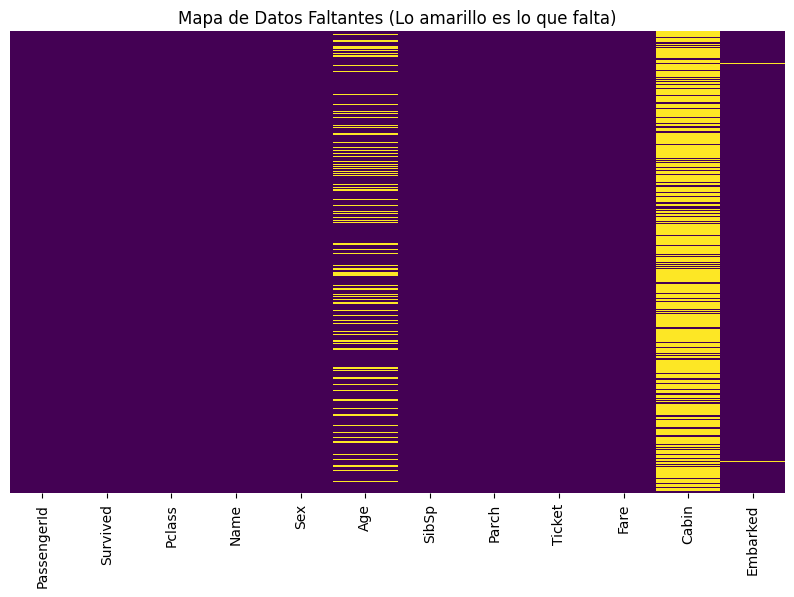

In [22]:
# Cargar (Asegúrate que la ruta sea correcta, usa os.listdir() si tienes dudas)
df = pd.read_csv('titanic-dataset/Titanic-Dataset.csv')

# Truco PRO para el examen: Mapa de calor de datos faltantes
# Si el inge pregunta: "¿Cómo sabes qué datos faltan?", le muestras esto:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de Datos Faltantes (Lo amarillo es lo que falta)')
plt.show()

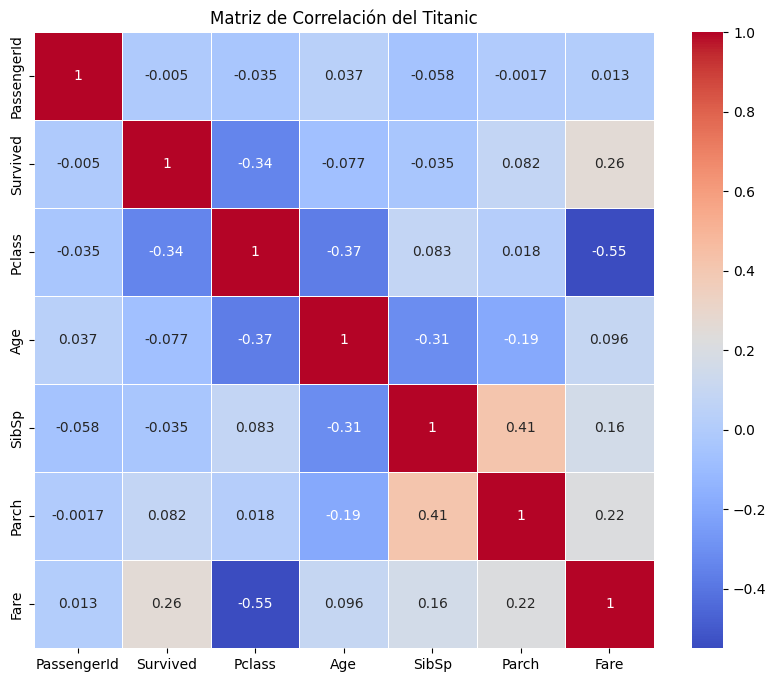

In [16]:
# 1. Filtramos solo las columnas numéricas (la compu no puede calcular correlación de texto)
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# 2. Calculamos la matriz
correlacion = df_numerico.corr()

# 3. Graficamos
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación del Titanic')
plt.show()

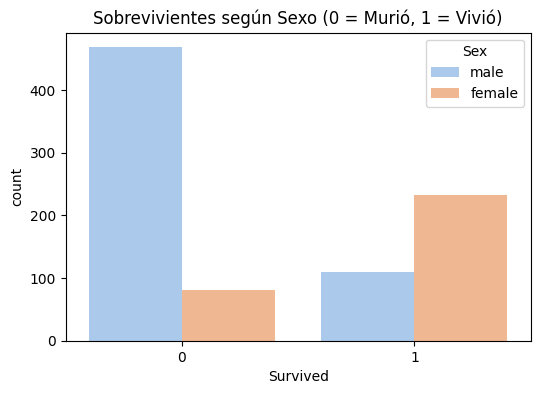

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', hue='Sex', palette='pastel')
plt.title('Sobrevivientes según Sexo (0 = Murió, 1 = Vivió)')
plt.show()

C:\Users\RYZEN\AppData\Local\Temp\ipykernel_20152\3689330825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')


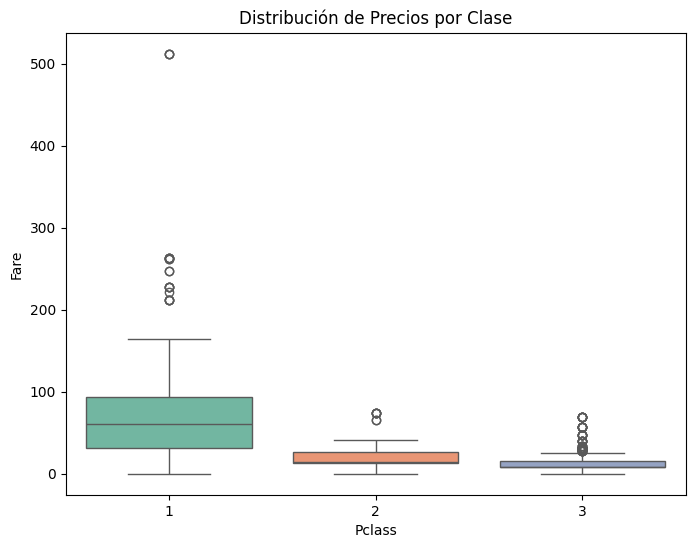

In [25]:
plt.figure(figsize=(8, 6))
# x = Categoría (Clase), y = Numerito a analizar (Precio/Fare)
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')
plt.title('Distribución de Precios por Clase')
plt.savefig('grafico.png')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

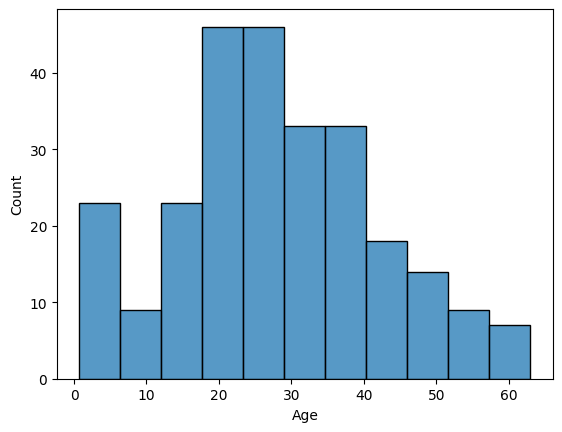

In [19]:
# Ejemplo: Crear un nuevo df SOLO con mujeres
df_mujeres = df[df['Sex'] == 'female']

# Ejemplo: Solo los que sobrevivieron (Survived == 1)
df_vivos = df[df['Survived'] == 1]

# Ahora graficas usando ese nuevo df filtrado
sns.histplot(data=df_mujeres, x='Age') # Histograma solo de mujeres

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


<Axes: xlabel='Survived', ylabel='Age'>

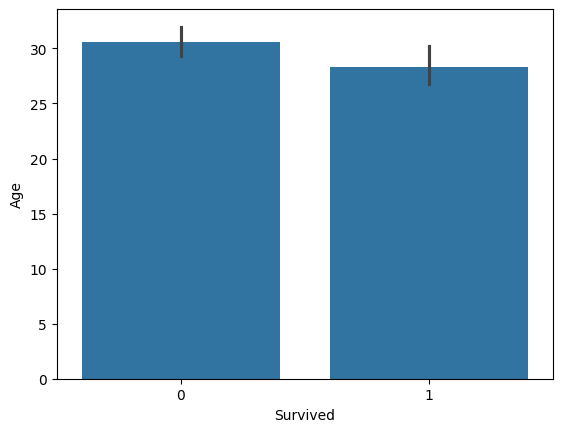

In [20]:
# Agrupar por 'Survived' y sacar el promedio (mean) de 'Age'
promedio_edad = df.groupby('Survived')['Age'].mean()
print(promedio_edad)

# Ojo: Si quieres graficar eso, usa un barplot simple
sns.barplot(x='Survived', y='Age', data=df)

In [21]:
# 1. Calcular el promedio de edad (usando NumPy o Pandas)
promedio = df['Age'].mean()

# 2. Rellenar los huecos (fillna)
df['Age'] = df['Age'].fillna(promedio)

# Verificas que ya no haya nulos
print(df['Age'].isnull().sum()) # Debería salir 0

0


In [24]:
df.to_csv('resultado_examen.csv', index=False)

ValueError: Could not interpret value `Nombre_Columna_Numerica` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>